# Title - Calculate distance between Earth and the Sun

# Problem Statement - 

The accurate calculation of the velocity and distance between Earth and the Sun is a fundamental task in astronomical research and space exploration. However, various factors such as changing orbital parameters, gravitational interactions, and observational limitations introduce challenges in obtaining precise measurements. Therefore, the problem at hand is to develop a robust and reliable computational model or method that can consistently and accurately calculate the velocity and distance between Earth and the Sun, taking into account the dynamic nature of their celestial relationship, for both scientific and practical applications.

## Why Need to calculate Earth and Sun distance ##

Here are the ressons 

1) Understanding Planetary Orbits -
2) Astronomical Measurements -
3) Understanding Climate and Seasons -
4) Space Exploration -
5) Scientific Research -

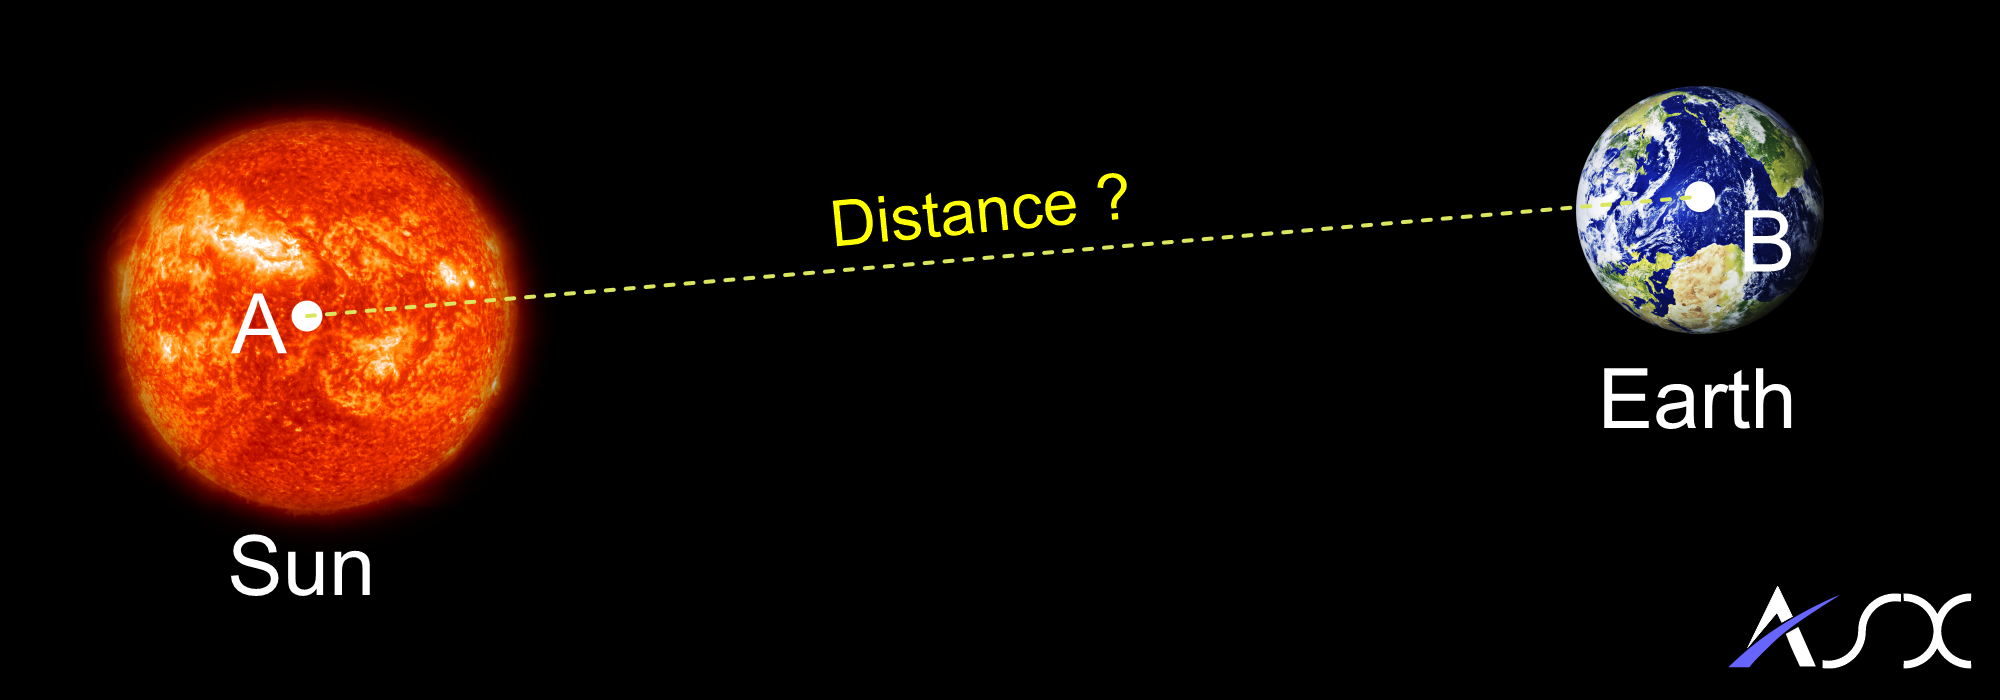

SpiceyPyis a Python library that provides access to NASA's SPICE toolkit. It allows you to perform complex space science calculations and simulations, including ephemerides (celestial body positions), coordinate transformations, and mission planning. SpiceyPy enables precise modeling of celestial object movements and is widely used in astronomy, planetary science, and space mission analysis

In [2]:
import spiceypy

In [3]:
import datetime

# get today's date
date_today = datetime.datetime.today()

# convert the datetime to a string, replacing the time with midnight
date_today = date_today.strftime('%Y-%m-%dT%H:%M:%S')
#('%Y-%m-%dT%H:%M:%S')
print(f"Today's date : {date_today}")

Today's date : 2023-10-04T16:49:25


datetime is a Python module that provides classes for working with dates and times. It allows you to create, manipulate, and format dates and times in various ways. The module is part of Python's standard library and is commonly used for tasks like timestamping, time arithmetic, and parsing date and time information.

In the SPICE Toolkit, the furnsh function (short for "furnish") is used to load SPICE kernel files into the SPICE system. These kernel files contain data related to the positions, orientations, and other parameters of celestial bodies, spacecraft, and events. By loading these kernel files into the SPICE system using furnsh, you make this data available for subsequent SPICE computations and simulations.

In [4]:
spiceypy.furnsh('lsk_naif0012.tls.txt')
spiceypy.furnsh('de432s.bsp')


In [5]:
et_today_midnight = spiceypy.utc2et(date_today)
print(f"The Ephemeris Time: {et_today_midnight}")

The Ephemeris Time: 749710234.1823434


Ephemeris Time (ET) is a highly accurate and stable time scale used in astronomy and space science. It provides a consistent way to measure time without the irregularities caused by Earth's rotation. ET is essential for precise calculations involving celestial bodies' positions and motions, and it does not include leap seconds, making it ideal for scientific applications.

In [6]:
earth_state_wrt_sun, earth_sun_light_time = spiceypy.spkgeo(targ=399,
                                                            et=et_today_midnight,
                                                            ref='ECLIPJ2000',
                                                            obs=10)

In [7]:
print('State vector of the Earth w.r.t. the Sun for "today":\n', earth_state_wrt_sun)

State vector of the Earth w.r.t. the Sun for "today":
 [ 1.46960353e+08  2.82437594e+07 -2.89502818e+03 -6.09647511e+00
  2.91380161e+01 -2.27102255e-03]


In [8]:
import math
earth_sun_distance = math.sqrt(earth_state_wrt_sun[0]**2.0 \
                             + earth_state_wrt_sun[1]**2.0 \
                             + earth_state_wrt_sun[2]**2.0)

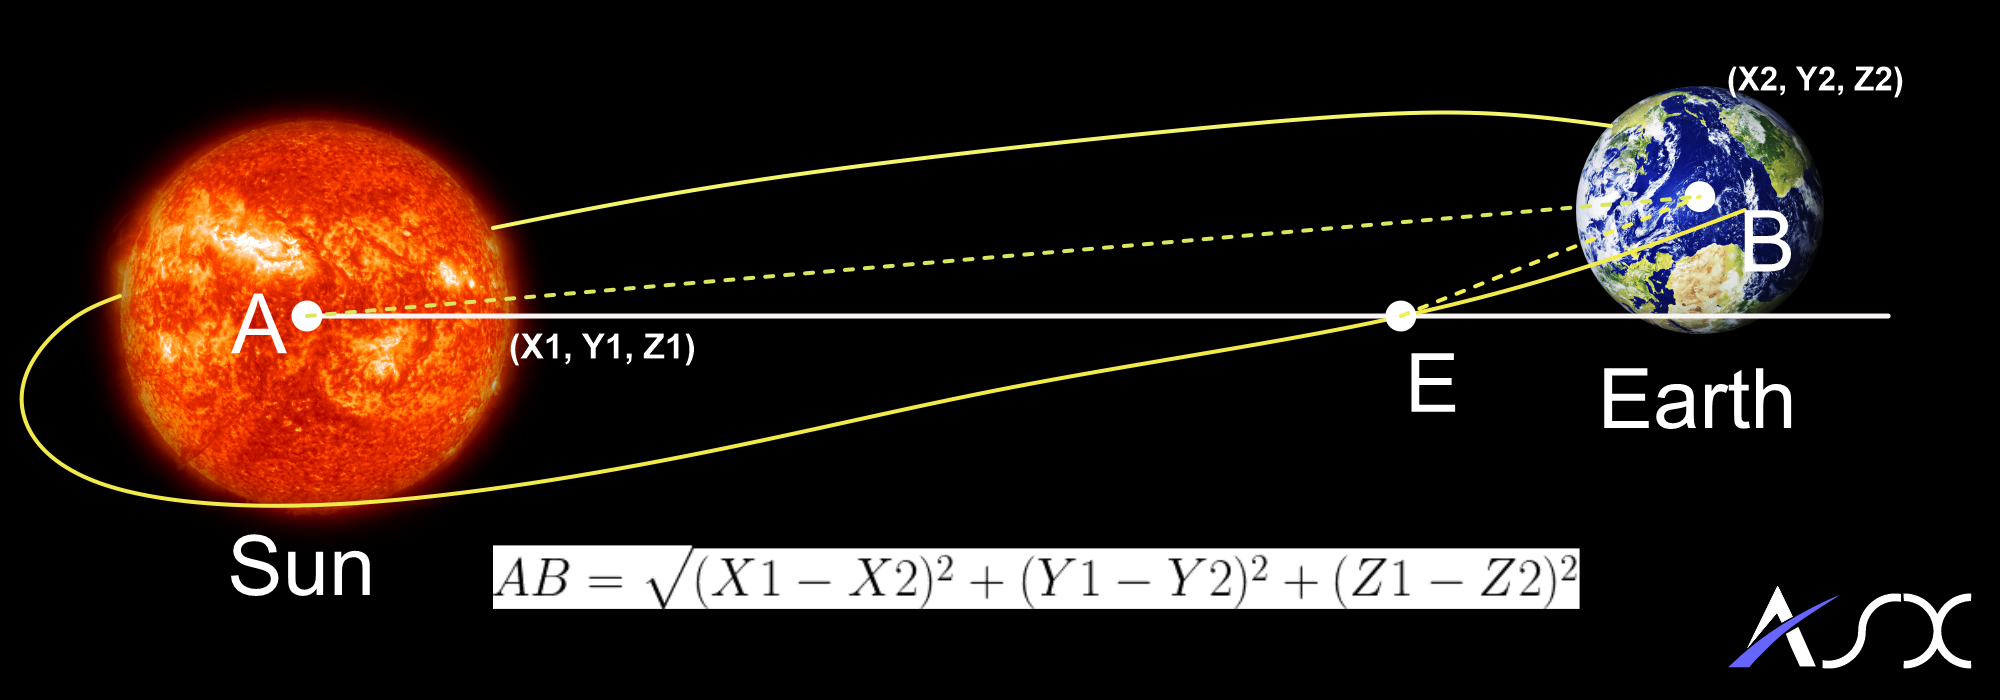

import math is a Python statement that allows you to use mathematical functions and constants provided by the math module. This module includes a wide range of mathematical operations, such as trigonometric functions, logarithms, exponentials, and more. By importing math, you gain access to these mathematical tools, making it easier to perform complex calculations in Python programs.

In [9]:
# Convert the distance in astronomical units (1 AU)
# Instead of searching for the "most recent" value, we use the default value in SPICE.
# This way, we can easily compare our results with the results of others.
earth_sun_distance_au = spiceypy.convrt(earth_sun_distance, 'km', 'AU')

# Cool, it works!
print('Current distance between the Earth and the Sun in AU:', earth_sun_distance_au)

Current distance between the Earth and the Sun in AU: 1.0003469649616252


In [10]:
# Convert the distance in astronomical units (AU) to kilometers (km)
au_to_km_distance = spiceypy.convrt(earth_sun_distance_au, 'AU', 'km')

# Print the result
print('Current distance between the Earth and the Sun in kilometers:', au_to_km_distance)


Current distance between the Earth and the Sun in kilometers: 149649775.8331256


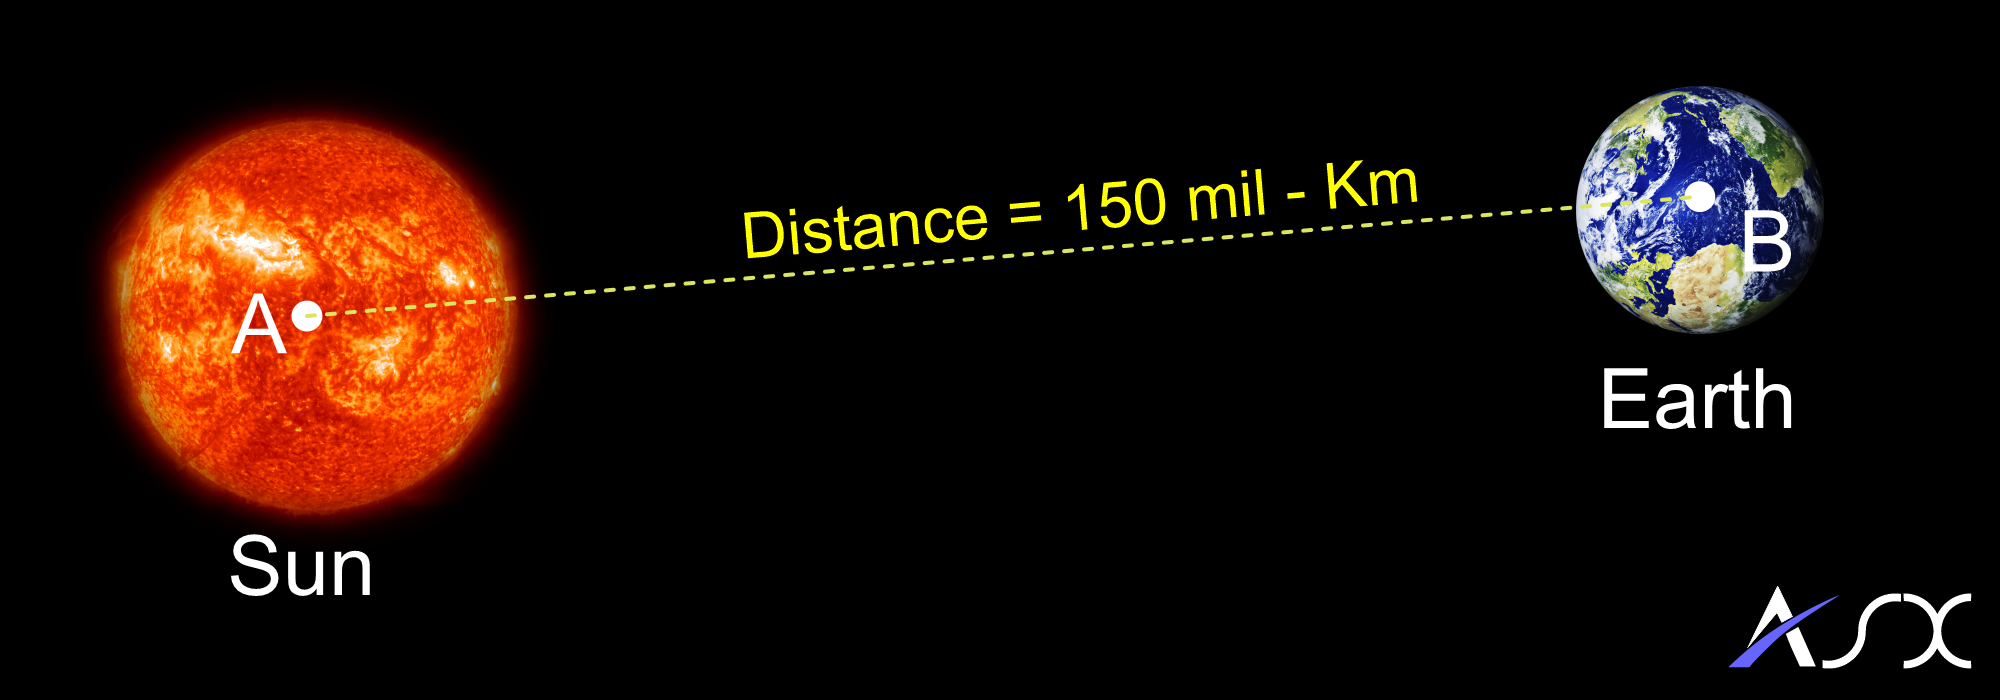

# Conclusion :
calculating the distance between Earth and the Sun is a fundamental astronomical measurement known as an astronomical unit (AU). This distance is approximately 93 million miles (150 million kilometers). Accurate knowledge of this distance is crucial for understanding celestial mechanics, planetary orbits, and the physical properties of the Sun. It serves as a vital reference point in astronomy and space exploration, allowing us to navigate and explore our solar system, study solar phenomena, and gain insights into the dynamics of planetary motion.

Reference link -

Object ID - https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/req/naif_ids.html#Earth%20Orbiting%20Spacecraft. 

Kernels - https://naif.jpl.nasa.gov/pub/naif/

Spekao - https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/spkgeo_c.html
        - https://spiceypy.readthedocs.io/en/main/documentation.html
        
        